# COGS 118A: Unsupervised Machine Learning Algorithms

## Implementing K-means & Visualization

In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plotCurrent(X, Rnk, Kmus):
    N, D = np.shape(X)
    K = np.shape(Kmus)[0]

    InitColorMat = np.matrix([[1, 0, 0], 
                              [0, 1, 0],   
                              [0, 0, 1],
                              [0, 0, 0],
                              [1, 1, 0], 
                              [1, 0, 1], 
                              [0, 1, 1]])

    KColorMat = InitColorMat[0:K]
    colorVec = Rnk.dot(KColorMat)
    muColorVec = np.eye(K).dot(KColorMat)

    plt.scatter(X[:,0], X[:,1], edgecolors=colorVec, marker='o', facecolors='none', alpha=0.3)
    plt.scatter(Kmus[:,0], Kmus[:,1], c=muColorVec, marker='D', s=50);

In [3]:
def calcSqDistances(X, Kmus):
    sqDis = np.zeros((np.shape(X)[0], np.shape(Kmus)[0]))
    for i in range(np.shape(X)[0]):
        for j in range(np.shape(Kmus)[0]):
            sqDis[i, j]= sum((X[i]-Kmus[j])**2)
    return sqDis

In [4]:
def determineRnk(sqDmat):
    R = np.zeros((len(sqDmat), len(sqDmat[0])))
    for i in range(len(sqDmat)):
        closest = np.argmin(sqDmat[i])
        R[i][closest] = 1
       
    return R


In [5]:
def recalcMus(X, Rnk):
    recalc = np.zeros((len(Rnk[0]), 2))
    for i in range(len(Rnk[0])):
        sumNew = np.zeros((1, 2))
        count = 0
        for j in range(len(X)):
            if Rnk[j,i]==1:
                count+=1
                sumNew[0,0] += X[j,0]
                sumNew[0,1] += X[j,1]
        sumNew = sumNew / count        
        recalc[i,0] = sumNew[0,0]
        recalc[i,1] = sumNew[0,1]
        
    return recalc
                
        

In [6]:
def runKMeans(K, fileString):
    # Load data file specified by fileStringfrom Bishop book
    X = np.loadtxt(fileString)

    # Determine and store data set information
    N = np.shape(X)[0]

    D = np.shape(X)[1]

    # Allocate space for the K mu vectors
    Kmus = np.zeros((K, D))

    # Initialize cluster centers by randomly picking points from the data
    rndinds = np.random.permutation(N)
    Kmus = X[rndinds[:K]];

    # Specify the maximum number of iterations to allow
    maxiters = 1000;

    for iter in range(maxiters):
        # Assign each data vector to closest mu vector as per Bishop (9.2)
        # Do this by first calculating a squared distance matrix where the n,k entry
        # contains the squared distance from the nth data vector to the kth mu vector

        # sqDmat will be an N-by-K matrix with the n,k entry as specfied above
        sqDmat = calcSqDistances(X, Kmus);

        # given the matrix of squared distances, determine the closest cluster
        # center for each data vector 

        # R is the "responsibility" matrix
        # R will be an N-by-K matrix of binary values whose n,k entry is set as 
        # per Bishop (9.2)
        # Specifically, the n,k entry is 1 if point n is closest to cluster k,
        # and is 0 otherwise
        Rnk = determineRnk(sqDmat)

        KmusOld = Kmus
        plotCurrent(X, Rnk, Kmus)
        plt.show()

        # Recalculate mu values based on cluster assignments as per Bishop (9.4)
        Kmus = recalcMus(X, Rnk)

        # Check to see if the cluster centers have converged.  If so, break.
        if sum(abs(KmusOld.flatten() - Kmus.flatten())) < 1e-6:
            break

    plotCurrent(X,Rnk,Kmus)

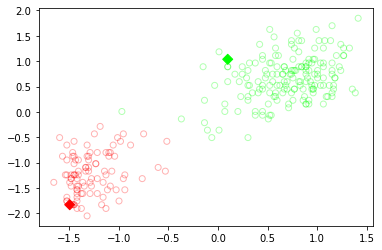

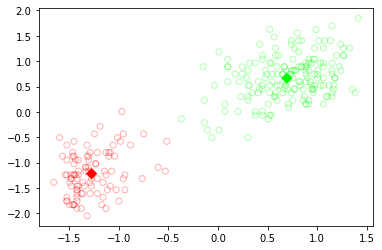

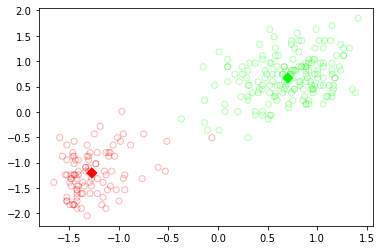

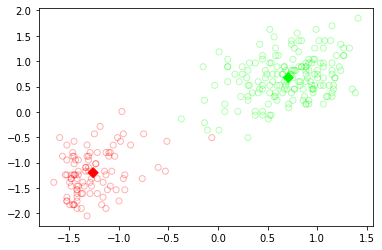

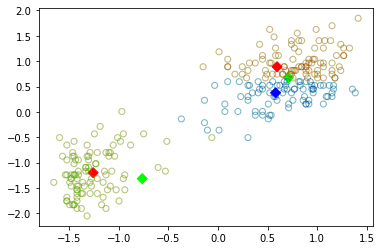

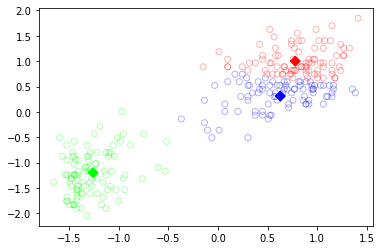

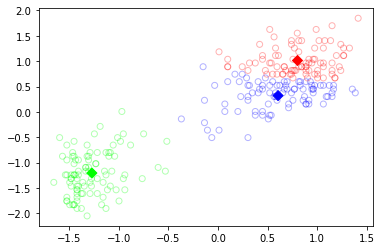

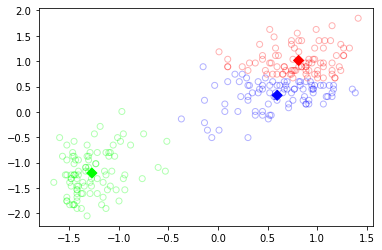

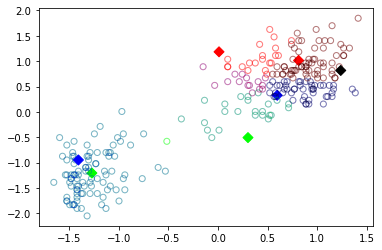

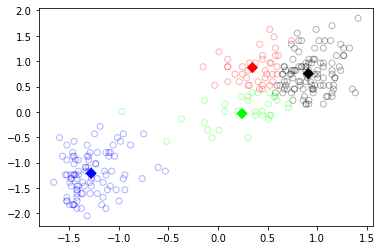

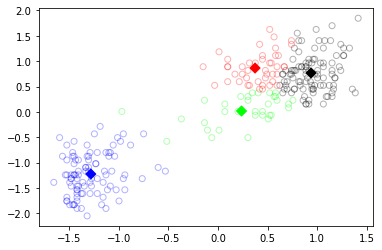

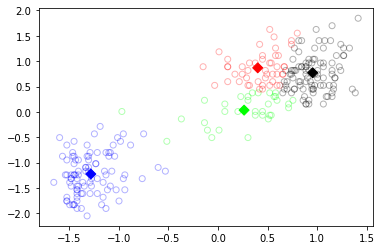

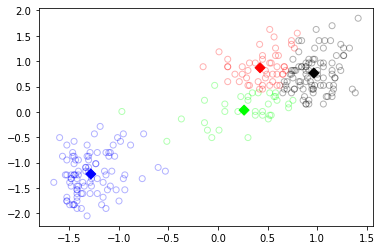

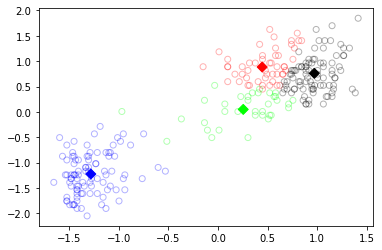

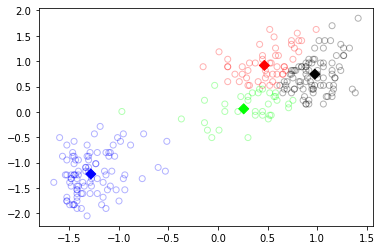

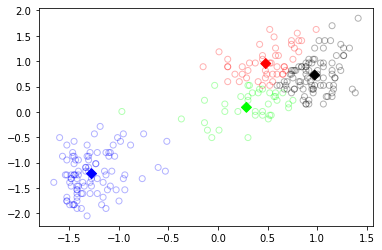

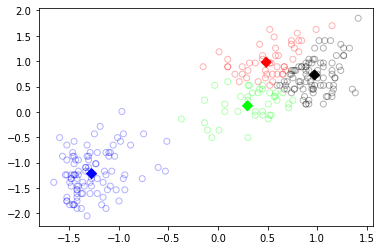

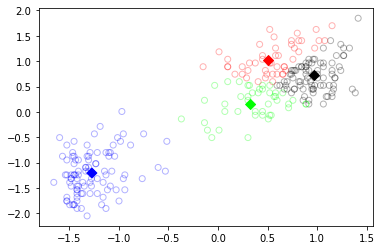

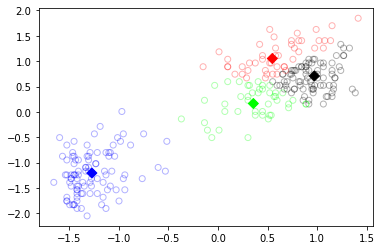

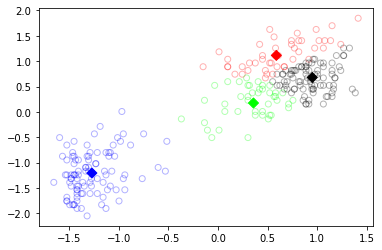

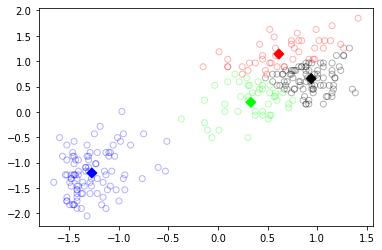

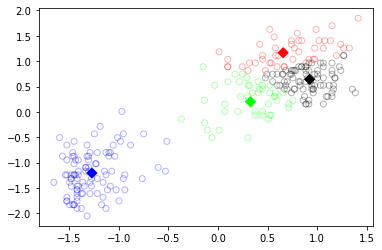

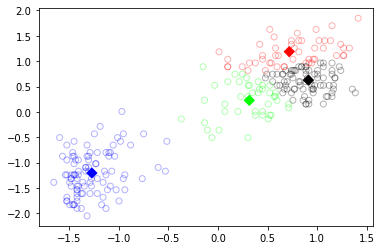

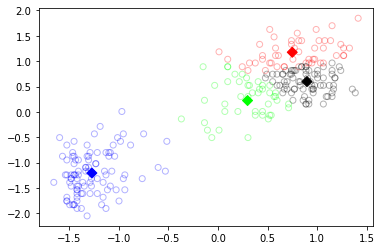

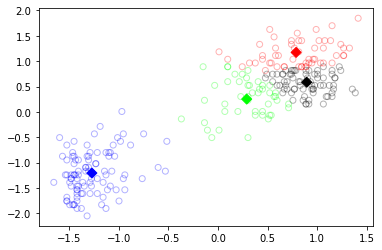

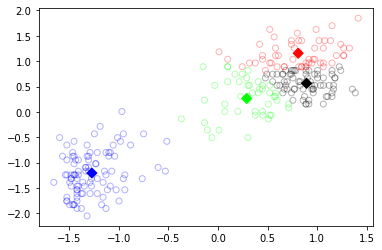

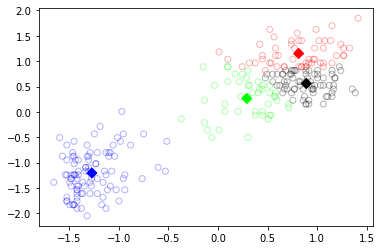

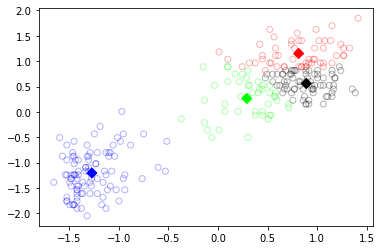

In [7]:
#K = 2
runKMeans(2, 'scaledfaithful.txt')
#K = 3
runKMeans(3, 'scaledfaithful.txt')
#K = 4
runKMeans(4, 'scaledfaithful.txt')